In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 버블 신호 레이블링

### 서울시 구별

In [2]:
import pandas as pd
data = pd.read_csv('./s_t_per_results.csv')
data.drop(columns = '날짜', axis =1)

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,0.728551,-0.635108,0.441671,0.530753,0.203509,0.937948,0.126803,-0.108148,0.601201,0.178247,...,0.798487,0.418668,0.921226,0.265751,0.183965,-0.027032,0.101066,1.554471,0.074754,0.398232
1,0.952704,-0.682007,1.590704,1.218400,1.077517,1.463626,0.940035,0.380094,1.154846,0.387806,...,0.952832,0.641615,1.193840,1.379250,1.093300,1.042836,1.833756,5.480640,4.500102,6.614624
2,1.581976,-0.392426,3.953682,2.365097,3.265987,3.296338,2.219594,0.834033,1.544767,0.418495,...,2.495946,1.919707,2.920069,3.627315,3.126359,2.529635,5.343784,9.241696,8.743431,11.429386
3,2.021256,-0.061287,4.645487,2.464826,4.254531,3.375999,3.476495,1.227290,1.801814,0.377610,...,2.859221,2.609448,5.409269,5.260721,4.192814,2.671407,6.853864,10.156717,9.915507,12.543616
4,1.238964,0.030532,5.032795,3.311760,4.368780,4.014971,4.146560,0.990373,1.972767,0.184338,...,3.421932,2.904787,6.186016,5.691096,5.172185,2.990585,8.639875,12.396824,11.006769,13.889531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,42.813067,40.722835,61.281691,55.347105,52.063477,45.636881,48.274228,46.208899,44.480694,44.444280,...,53.012390,52.293753,52.378887,62.363192,57.350491,49.359054,62.357072,62.882558,61.393602,58.024188
245,42.880402,40.634311,61.272599,55.352693,52.030233,45.482968,47.976678,46.022122,44.362879,44.115485,...,52.841927,52.101921,52.343812,62.364687,57.255566,49.106062,62.509291,63.059466,61.666313,58.171383
246,42.983103,40.608892,61.375230,55.484911,52.052000,45.466997,47.866589,46.131338,44.341146,44.088096,...,52.896507,52.060695,52.279434,62.501324,57.340645,48.980318,62.619815,63.281199,62.057415,58.300742
247,43.042437,40.616135,61.468503,55.613663,52.143735,45.534263,47.588623,46.121794,44.368934,44.055467,...,52.943269,52.036654,52.218652,62.596437,57.313990,48.955035,62.671147,63.424128,62.348709,58.384257


In [3]:
import pandas as pd
data = pd.read_csv('./s_t_per_results.csv')
data.drop(columns = '날짜', axis =1)

# 현재시점으로부터 n개월까지
period = 12  #12개월

# 각 구별 레이블 컬럼 추가 및 0으로 초기화
for district in data.columns[1:26]:  # 25개 컬럼 (구)
    data[f"{district}_label"] = 0  # 0으로 초기화

# 신호 레이블
for i in range(data.shape[0] - period): # 201301~202306 까지
    for district in data.columns[1:26]:  # 각 시점별로 25개 구 라벨링


        future_values = data.loc[i:i+period, district] #i + 1 : 현재 달 포함해서 부터 6개월까지
        mean_future = future_values.mean()
        std_future = future_values.std()

        current_value = data.at[i, district]

        # 라벨링
        if current_value > mean_future + std_future:
            # 버블 하강중
            data.at[i, f"{district}_label"] = -1
        elif current_value < mean_future - std_future:
            # 버블 상승중
            data.at[i, f"{district}_label"] = 1

data.head()


,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구_label,구로구_label,금천구_label,영등포구_label,동작구_label,관악구_label,서초구_label,강남구_label,송파구_label,강동구_label
0,2003-03-01,0.728551,-0.635108,0.441671,0.530753,0.203509,0.937948,0.126803,-0.108148,0.601201,...,1,1,1,1,1,1,1,1,1,1
1,2003-04-01,0.952704,-0.682007,1.590704,1.218400,1.077517,1.463626,0.940035,0.380094,1.154846,...,1,1,1,1,1,1,1,1,1,1
2,2003-05-01,1.581976,-0.392426,3.953682,2.365097,3.265987,3.296338,2.219594,0.834033,1.544767,...,1,1,1,1,1,1,1,1,1,1
3,2003-06-01,2.021256,-0.061287,4.645487,2.464826,4.254531,3.375999,3.476495,1.227290,1.801814,...,1,1,1,1,1,1,1,1,1,1
4,2003-07-01,1.238964,0.030532,5.032795,3.311760,4.368780,4.014971,4.146560,0.990373,1.972767,...,1,0,1,1,1,1,1,1,1,1


In [4]:
data.to_csv("./bubble_labels.csv")

### 지역별

In [5]:
import pandas as pd
data = pd.read_csv('./st_per_results_region.csv')
data.drop(columns = '날짜', axis =1)

# 현재시점으로부터 n개월까지
period = 12  #12개월

# 각 구별 레이블 컬럼 추가 및 0으로 초기화
for district in data.columns[1:12]:  # 25개 컬럼 (구)
    data[f"{district}_label"] = 0  # 0으로 초기화

# 신호 레이블
for i in range(data.shape[0] - period): # 201301~202306 까지
    for district in data.columns[1:12]:  # 각 시점별로 25개 구 라벨링


        future_values = data.loc[i:i+period, district] #i + 1 : 현재 달 포함해서 부터 6개월까지
        mean_future = future_values.mean()
        std_future = future_values.std()

        current_value = data.at[i, district]

        # 라벨링
        if current_value > mean_future + std_future:
            # 버블 하강중
            data.at[i, f"{district}_label"] = -1
        elif current_value < mean_future - std_future:
            # 버블 상승중
            data.at[i, f"{district}_label"] = 1

data.head()


,날짜,전국,서울,강북14개구,강남11개구,6개광역시,부산,대전,대구,인천,...,서울_label,강북14개구_label,강남11개구_label,6개광역시_label,부산_label,대전_label,대구_label,인천_label,광주_label,울산_label
0,2003-03-01,0.696414,0.513148,0.500587,0.556543,0.860140,1.214906,0.003592,0.420804,0.620229,...,1,1,1,1,1,1,1,1,1,1
1,2003-04-01,1.823134,2.326289,0.933475,2.969016,1.610362,2.071114,0.524893,0.842508,0.146559,...,1,1,1,1,1,1,1,1,1,1
2,2003-05-01,4.094940,4.820347,2.093827,6.114887,3.312628,4.188019,1.982898,2.548014,1.187260,...,1,1,1,1,1,1,1,1,1,1
3,2003-06-01,5.323186,5.799815,2.452432,7.336884,4.731904,6.925330,2.702775,3.911955,1.364174,...,1,1,1,1,1,1,1,1,1,0
4,2003-07-01,5.773313,6.509610,2.651485,8.474988,5.228362,7.266855,3.530211,4.387788,1.593900,...,1,1,1,1,1,1,1,1,1,0


In [6]:
data.to_csv("./region_bubble_labels.csv")

## 시각화

In [7]:
bubble_region = pd.read_csv("region_bubble_labels.csv")
bubble= pd.read_csv("bubble_labels.csv")

In [8]:
all_label_df = pd.merge(bubble_region[['날짜', '서울_label', '강북14개구_label', '강남11개구_label']],bubble[['날짜','종로구_label',
       '중구_label', '용산구_label', '성동구_label', '광진구_label', '동대문구_label',
       '중랑구_label', '성북구_label', '강북구_label', '도봉구_label', '노원구_label',
       '은평구_label', '서대문구_label', '마포구_label', '양천구_label', '강서구_label',
       '구로구_label', '금천구_label', '영등포구_label', '동작구_label', '관악구_label',
       '서초구_label', '강남구_label', '송파구_label', '강동구_label']], on = '날짜', how = 'inner')

all_label_df.to_csv("./all_seoul_label.csv")

<ipython-input-9-d6c5fcb9d7db>:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


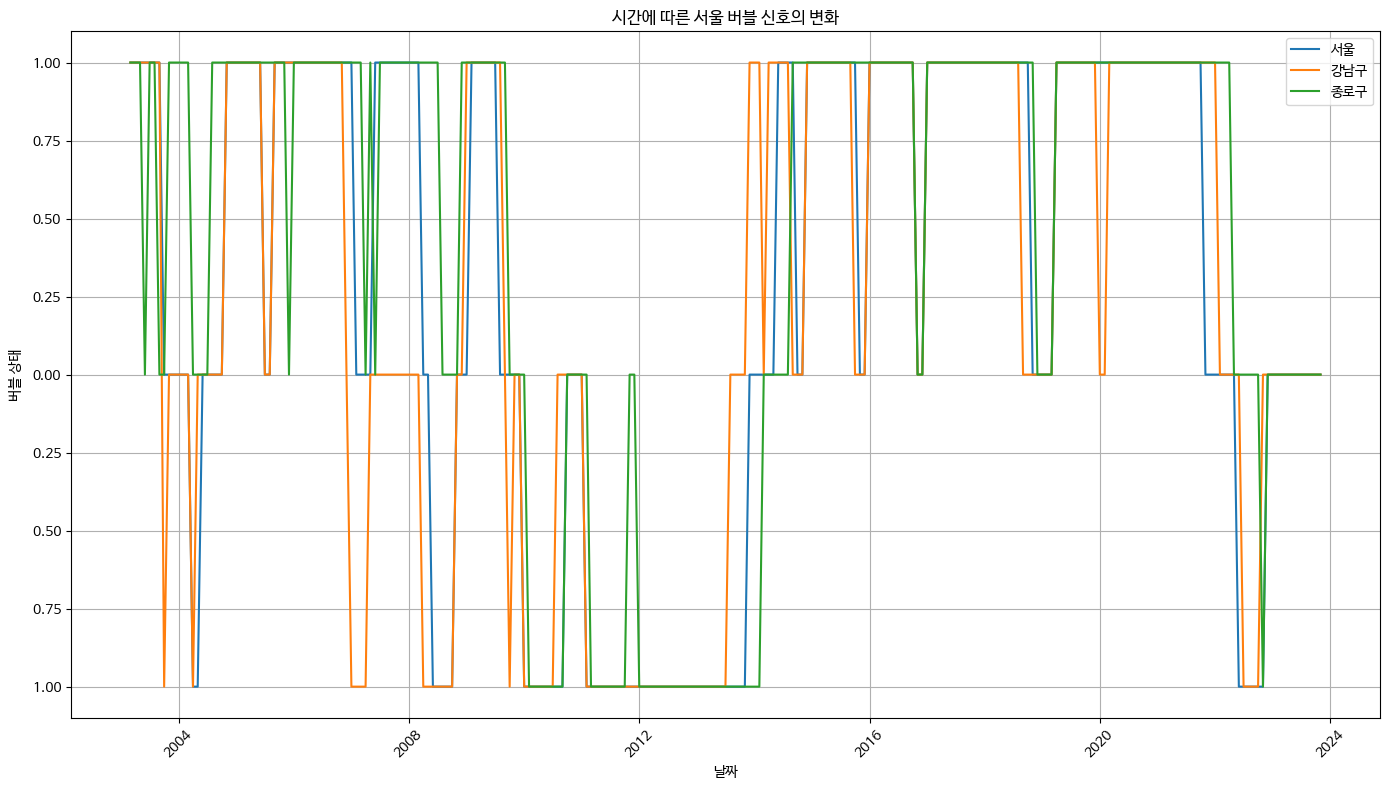

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜를 datetime 객체로 변환
all_label_df['날짜'] = pd.to_datetime(all_label_df['날짜'])

# 선 그래프를 그리기 위한 설정
plt.figure(figsize=(14, 8))

# 서울, 강북14개구, 강남11개구, 6개광역시의 버블 상태 시각화
for region in ['서울_label', '강남구_label', '종로구_label']:
    plt.plot(all_label_df['날짜'], all_label_df[region], label=region.replace('_label', ''))

plt.title('시간에 따른 서울 버블 신호의 변화')
plt.xlabel('날짜')
plt.ylabel('버블 상태')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


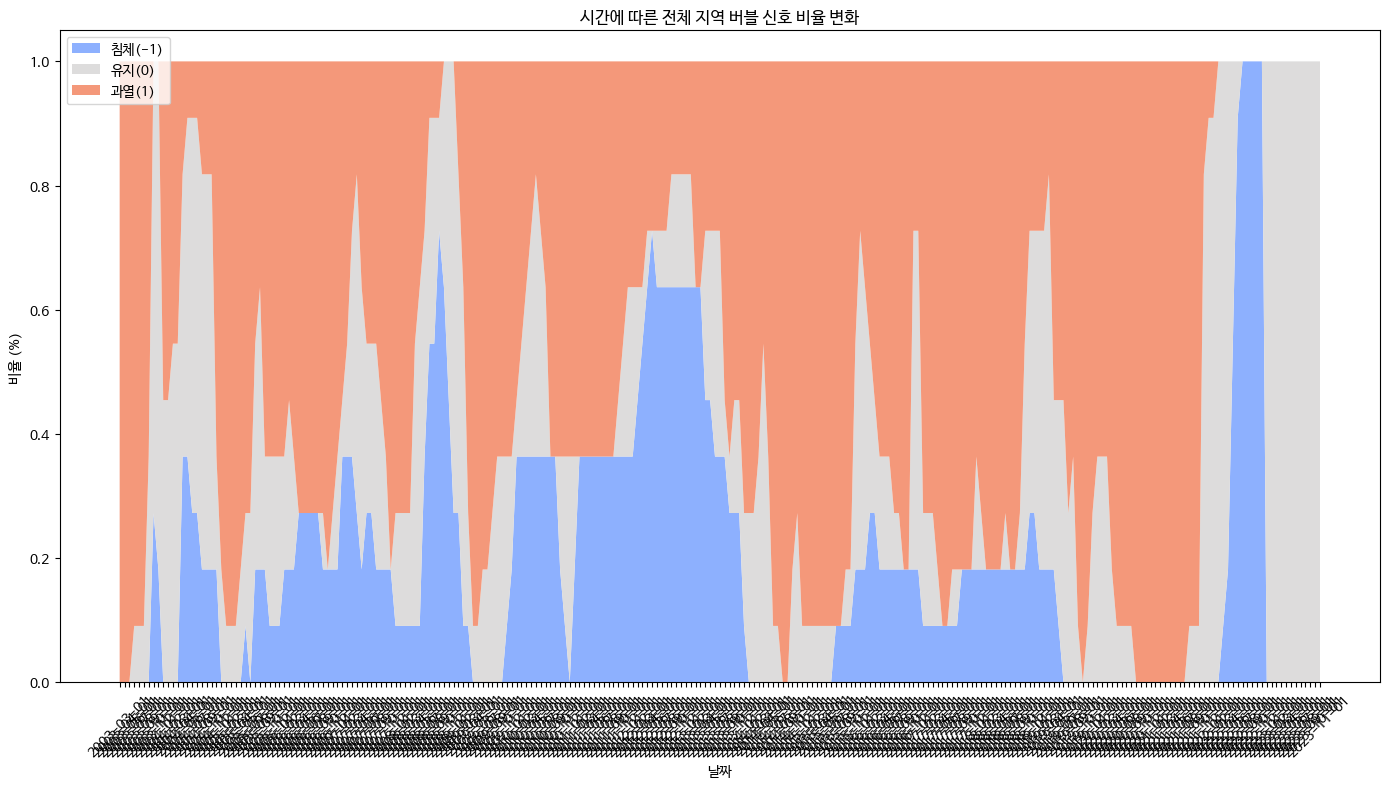

In [10]:
colors = sns.color_palette("coolwarm", 3)

# 버블 신호(-1, 0, 1)의 비율 계산
bubble_signals = data.filter(regex='_label$')
bubble_signals_by_date = bubble_signals.apply(lambda x: x.value_counts(normalize=True), axis=1).fillna(0)

# 날짜별로 각 신호의 비율 계산
bubble_signals_by_date['날짜'] = data['날짜']
bubble_signals_by_date = bubble_signals_by_date.groupby('날짜').mean().reset_index()

# 스택드 바 차트로 시각화
plt.figure(figsize=(14, 8))
plt.stackplot(bubble_signals_by_date['날짜'],
              bubble_signals_by_date[-1],
              bubble_signals_by_date[0],
              bubble_signals_by_date[1],
              labels=['침체(-1)', '유지(0)', '과열(1)'],
              colors=colors)

plt.title('시간에 따른 전체 지역 버블 신호 비율 변화')
plt.xlabel('날짜')
plt.ylabel('비율 (%)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

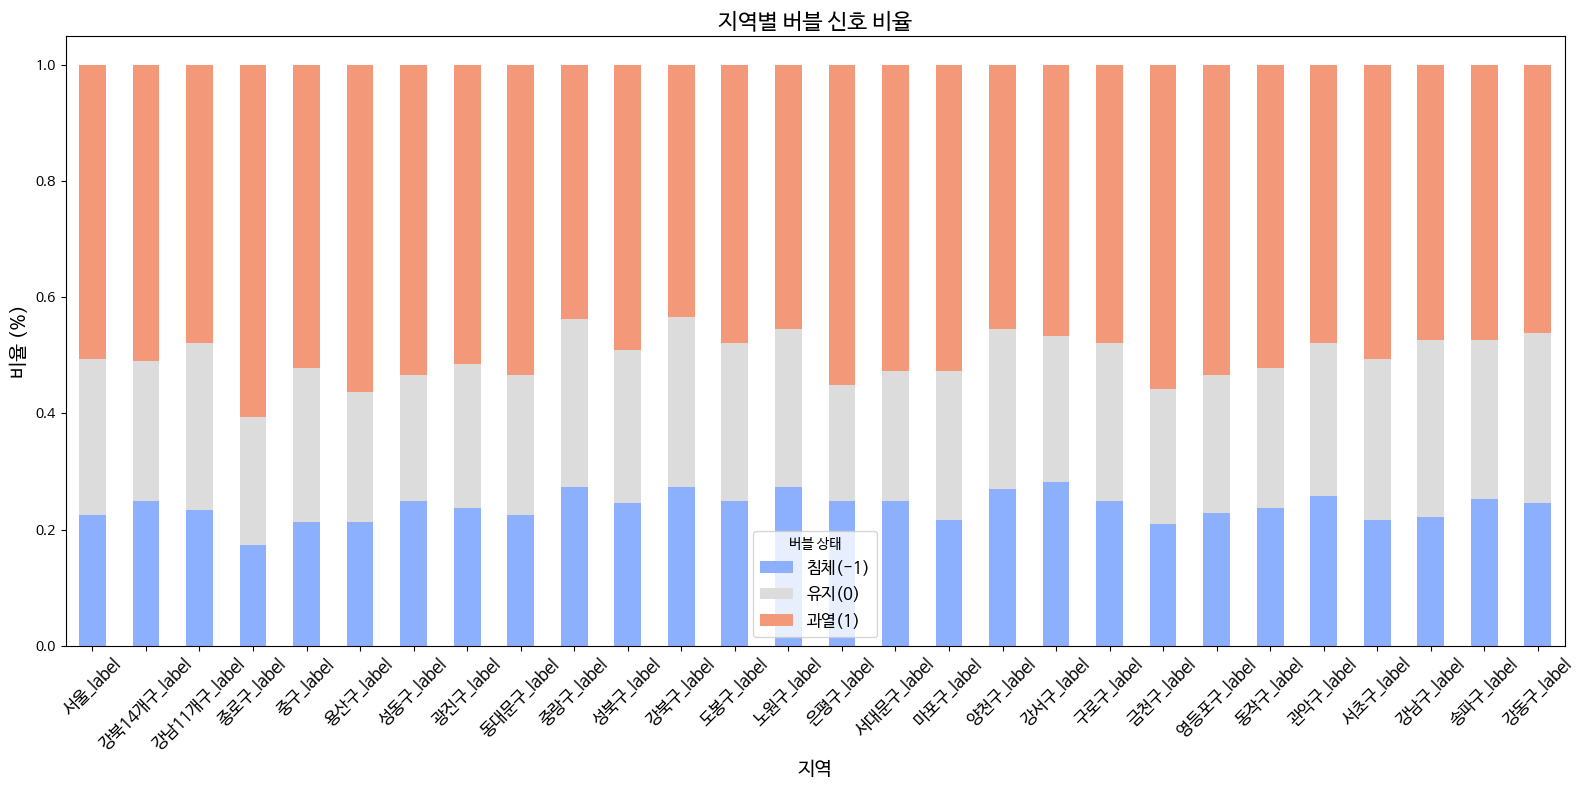

In [13]:
# 지역별 버블 신호 비율 계산
region_labels = [col for col in all_label_df.columns if '_label' in col]  # 버블 신호가 포함된 컬럼 선택
region_signal_counts = all_label_df[region_labels].apply(pd.Series.value_counts, normalize=True).fillna(0).T

# 계산된 비율을 바탕으로 시각화
region_signal_counts.plot(kind='bar', stacked=True, figsize=(16, 8), color=colors)
plt.title('지역별 버블 신호 비율', fontsize=16)
plt.xlabel('지역', fontsize=14)
plt.ylabel('비율 (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='버블 상태', labels=['침체(-1)', '유지(0)', '과열(1)'], fontsize=12)

plt.tight_layout()
plt.show()
